# K-means and PCA

## 1. Importing libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score

## 2. Importing dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Dropping Unnamed: 32 and id
df_final = df.drop(columns=['Unnamed: 32','id'],axis=1)
df_final.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df_final.drop(columns=['diagnosis'])
y = df_final['diagnosis'].copy()

X.shape


(569, 30)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X.values.astype(float))

## 3. K-Means using Numpy

In [ ]:
# 1. K-Means implementation using NumPy
class KMeans:
    def __init__(self, n_clusters=None, max_iter=300, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters # Number of clusters hasn't been determined yet, will be determined later by elbow method
        self.max_iter = max_iter # Maximum number of iterations
        self.tol = tol # Tolerance for convergence
        self.random_state = random_state # Seed for random number generator
        self.centroids = None # Centroids
        self.labels = None # Labels
        self.inertia_ = None # Inertia
        
    def fit(self, X): # Trains KMeans Model on data X
        np.random.seed(self.random_state) # Apply random seed 
        n_samples, n_features = X.shape # Get number of samples and features
        
        # If n_clusters is not specified, use elbow method to determine it
        if self.n_clusters is None:
            self.n_clusters = self.elbow_method(X) # Determine number of clusters using elbow method
            print(f"Optimal number of clusters determined by elbow method: {self.n_clusters}")
        
        # Initialize centroids randomly
        random_idx = np.random.choice(n_samples, self.n_clusters, replace=False) # Choose random indices
        self.centroids = X[random_idx] # Assign random points as centroids
        
        for iteration in range(self.max_iter):
            # Calculate Euclidean distances between points and centroids
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            
            # Assign labels based on closest centroid
            self.labels = np.argmin(distances, axis=0) # axis=0 for column-wise
            
            # Calculate new centroids, by getting the mean of all points in each cluster
            # For each cluster i, calculate the mean of all points in that cluster
            new_centroids = np.array([X[self.labels == i].mean(axis=0) 
                                    for i in range(self.n_clusters)])
            
            # Check for convergence (if centroids have moved less than tolerance, break)
            # linalg.norm returns the norm of the vector (new centroids - old centroids)
            # axis=1 for row-wise
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
                
            self.centroids = new_centroids # Updating Centroids
        
        # Calculate inertia (sum of squared distances)
        self.inertia_ = 0 # Initialize with 0
        for i in range(self.n_clusters): # For each cluster
            cluster_points = X[self.labels == i] # Get all points in that cluster
            if len(cluster_points) > 0: # If cluster is not empty
                # Calculate the sum of squared distances between each point in the cluster and its centroid
                self.inertia_ += np.sum((cluster_points - self.centroids[i])**2)
        
        return self
    
    def elbow_method(self, X, k_range=range(1, 11)):
        sse = [] # Empty list to store SSE values
        for k in k_range: # For each value of k
            # Create a temporary KMeans instance with fixed k
            temp_kmeans = KMeans(n_clusters=k, max_iter=self.max_iter, 
                                tol=self.tol, random_state=self.random_state)
            temp_kmeans._fit_fixed_k(X) # Call _fit_fixed_k method for this specific k
            sse.append(temp_kmeans.inertia_) # Append SSE value
        
        # Plot elbow curve
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, sse, 'bo-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title('Elbow Method for Optimal k')
        plt.grid(True)
        plt.show()
        
        # Find the elbow point (using the second derivative method)
        if len(sse) > 2:
            first_derivative = np.diff(sse) # Measures how much SSE decreases when we add one more cluster
            second_derivative = np.diff(first_derivative) # Measures reate of improvement in SSE 
            elbow_index = np.argmax(np.abs(second_derivative)) + 1 # Find the index of the max curvature (elbow point)
            # we use +1 because np.diff() returns one less element than the original array
            # How np.diff() works: np.diff([100, 80, 60, 45, 35, 30, 28]) returns [-20, -20, -15, -10, -5, -2]
            # np.diff() returns one less element than the original array
            optimal_k = k_range[elbow_index] # Get the value of k at the elbow point and set it as the optimal k
        else:
            optimal_k = k_range[0] # If only one value of k is given, set it as the optimal k
        
        return optimal_k
    
    def _fit_fixed_k(self, X): # Used to calculate inertia for a single given k number of clusters
        
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        random_idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_idx]
        
        for iteration in range(self.max_iter):
            # Calculate distances between points and centroids
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            
            # Assign labels based on closest centroid
            self.labels = np.argmin(distances, axis=0)
            
            # Calculate new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) 
                                    for i in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
                
            self.centroids = new_centroids
        
        # Calculate inertia (sum of squared distances)
        self.inertia_ = 0
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            if len(cluster_points) > 0:
                self.inertia_ += np.sum((cluster_points - self.centroids[i])**2)
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

## 4. PCA

In [22]:
# 2. PCA implementation using NumPy
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components # Number of Principal Components after transformation
        self.eigenvalues = None # Eigenvalues
        self.eigenvectors = None # Eigenvectors
        self.components = None # Principal Components
        self.mean = None # Means
        self.explained_variance_ratio_ = None # Explained variance ratio
        
    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0) # Calculate Mean
        X_centered = X - self.mean # (X - Mean)
        
        # Calculate covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        # Calculate eigenvalues and eigenvectors using linalg.eigh
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(eigenvalues)[::-1] # [::-1] reverses the list to get largest eigenvalues first
        
        eigenvalues = eigenvalues[idx] 
        self.eigenvalues = eigenvalues
        
        eigenvectors = eigenvectors[:, idx] # reorder the columns (eigenvectors) according to indices in idx (sorted eigenvalues)
        self.eigenvectors = eigenvectors

        # Determine number of components
        if self.n_components is None: # If n_components is not specified
            self.n_components = X.shape[1] # Use all components / features
        else:
            self.n_components = min(self.n_components, X.shape[1]) # Use specified number of components
        
        # Store components
        self.components = eigenvectors[:, :self.n_components] 
        # : --> select all rows
        # :self.n_components --> select number of columns that starts from index 0 to self.n_components 
        
        # Calculate explained variance ratio
        total_variance = np.sum(eigenvalues) # Total Variance = Sum of Eigenvalues
        
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance 
        # Explained variance ratio = Eigenvalue / Total Variance
        # We are calculating explained variance ratio for each Principal Component
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean # Center the data
        return np.dot(X_centered, self.components) # Project onto PCs by multiplying centered data with PC matrix
    
    def fit_transform(self, X):
        self.fit(X) #  Fitting the model
        return self.transform(X) # Projecting the data

## Experiment 1: Cluster dataset using k means without PCA

EXPERIMENT 1: K-MEANS WITHOUT PCA


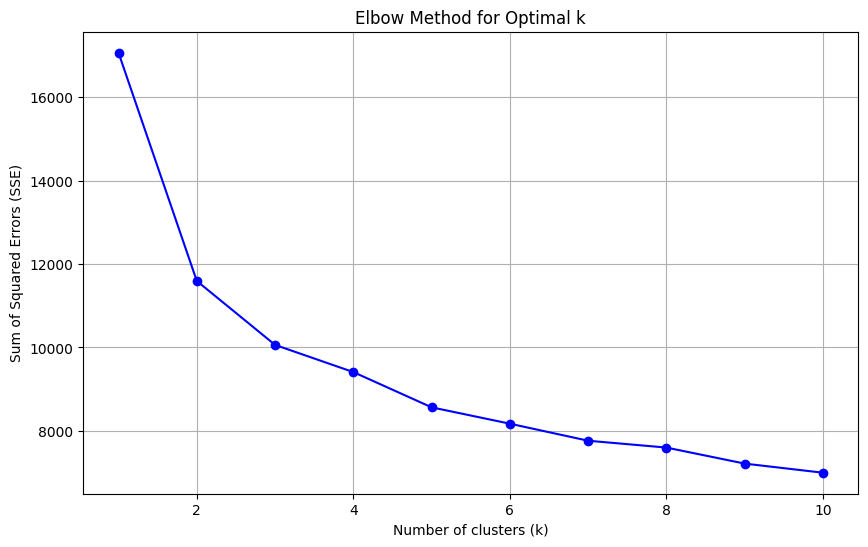

Optimal number of clusters determined by elbow method: 2
Number of clusters: 2
Inertia (SSE): 11595.99
Adjusted Rand Index (comparison with true labels): 0.6709
Silhouette Score: 0.3423


In [20]:
print("EXPERIMENT 1: K-MEANS WITHOUT PCA")

kmeans1 = KMeans(random_state=42)
kmeans1.fit(X)

print(f"Number of clusters: {kmeans1.n_clusters}")
print(f"Inertia (SSE): {kmeans1.inertia_:.2f}")

# Calculate evaluation metrics
ari = adjusted_rand_score(y, kmeans1.labels) # How well the clusters match the true labels
silhouette = silhouette_score(X, kmeans1.labels) # How well the clusters are separated

print(f"Adjusted Rand Index (comparison with true labels): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

## Experiment 2: Apply PCA, then cluster dataset using KMeans

EXPERIMENT 2: PCA + K-MEANS
Optimal number of components determined by elbow method: 2


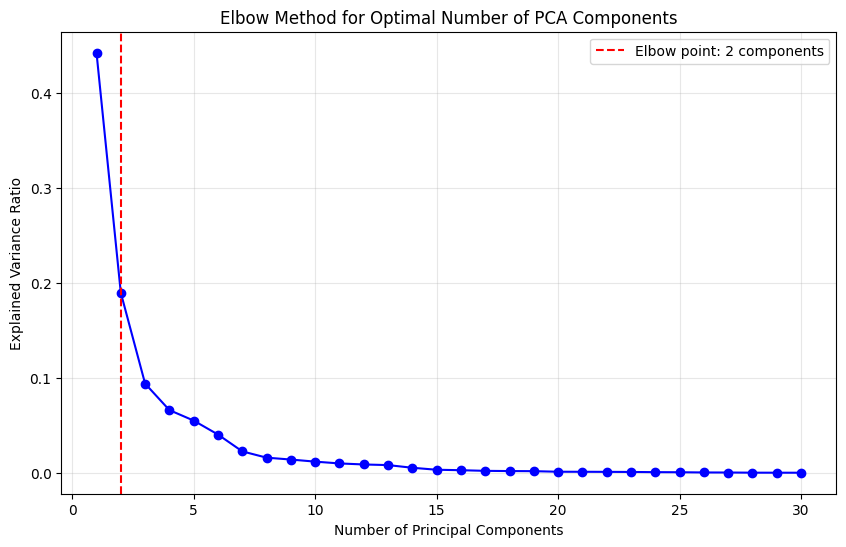


Applying PCA with 2 components...
Original dimensions: 30
Reduced dimensions: 2
Total explained variance: 0.6324

Applying K-Means on PCA-transformed data...


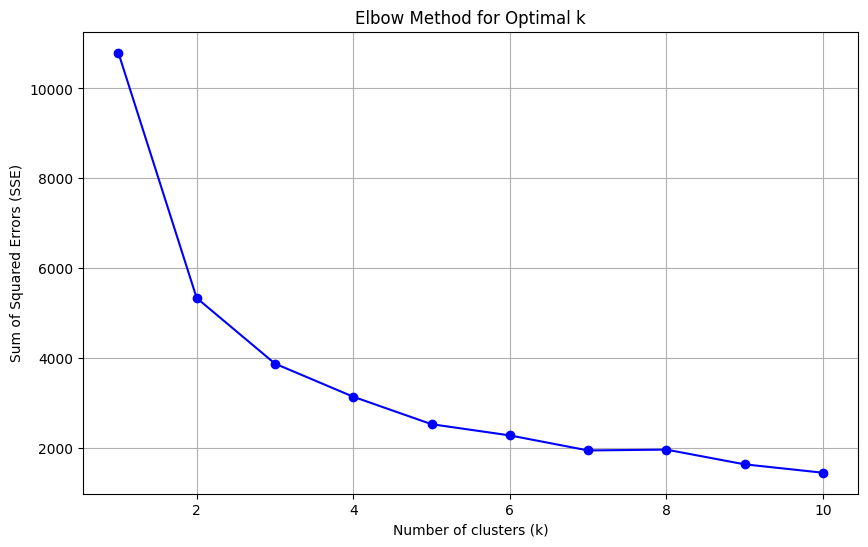

Optimal number of clusters determined by elbow method: 2
Number of clusters: 2
Inertia (SSE): 5332.98
Adjusted Rand Index (comparison with true labels): 0.6650
Silhouette Score: 0.5081


In [24]:
print("EXPERIMENT 2: PCA + K-MEANS")

# Fit PCA with all components to get eigenvalues
pca_full = PCA(n_components=None)
pca_full.fit(X)

# Get explained variance ratio so we can use it for elbow method
explained_variance_ratio = pca_full.explained_variance_ratio_

# Apply elbow method directly on explained variance ratios
def find_optimal_components(explained_variance_ratio):
    if len(explained_variance_ratio) > 2: # If there are more than 2 components
       
        # Calculate second derivative to find point of maximum curvature
        first_derivative = np.diff(explained_variance_ratio)
        second_derivative = np.diff(first_derivative)
        elbow_index = np.argmax(np.abs(second_derivative)) + 2
        optimal_components = min(max(2, elbow_index), len(explained_variance_ratio)) # Take max of 2 and elbow index
        return optimal_components # Return the optimal number of components
    else:
        return len(explained_variance_ratio) # If there are less than 2 components, return the number of components

optimal_components = find_optimal_components(explained_variance_ratio) # Call the above function
print(f"Optimal number of components determined by elbow method: {optimal_components}")

# Plot the elbow curve 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.axvline(x=optimal_components, color='r', linestyle='--', 
           label=f'Elbow point: {optimal_components} components')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for Optimal Number of PCA Components')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Now apply PCA with the optimal number of components
print(f"\nApplying PCA with {optimal_components} components...")
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)

print(f"Original dimensions: {X.shape[1]}")
print(f"Reduced dimensions: {X_pca.shape[1]}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Apply K-Means on PCA-transformed data
print("\nApplying K-Means on PCA-transformed data...")
kmeans2 = KMeans(random_state=42)
kmeans2.fit(X_pca)

print(f"Number of clusters: {kmeans2.n_clusters}")
print(f"Inertia (SSE): {kmeans2.inertia_:.2f}")

# Calculate evaluation metrics
ari_pca = adjusted_rand_score(y, kmeans2.labels)
silhouette_pca = silhouette_score(X_pca, kmeans2.labels)

print(f"Adjusted Rand Index (comparison with true labels): {ari_pca:.4f}")
print(f"Silhouette Score: {silhouette_pca:.4f}")

## Experimenting with different number of Principal Components

EXPERIMENTING WITH DIFFERENT NUMBERS OF PRINCIPAL COMPONENTS


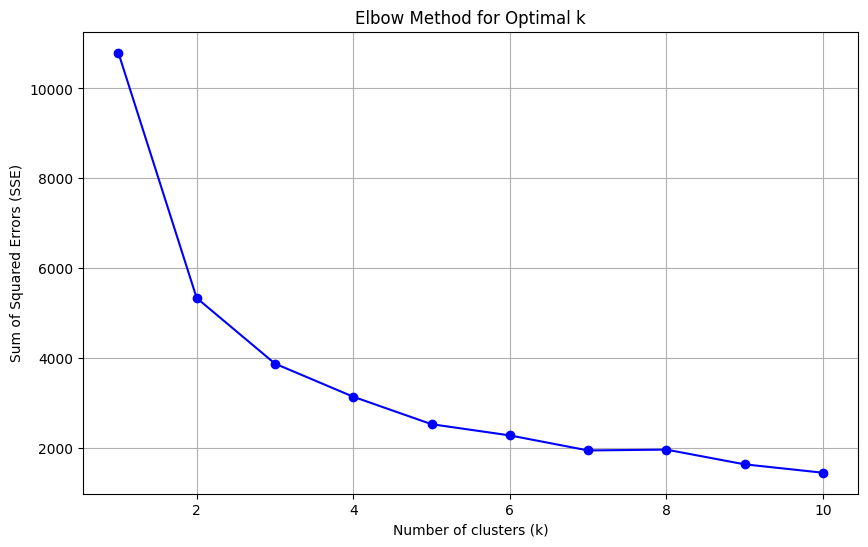

Optimal number of clusters determined by elbow method: 2
n_components = 2: Inertia = 5332.98, ARI = 0.6650, Silhouette = 0.5081, Variance = 63.243%


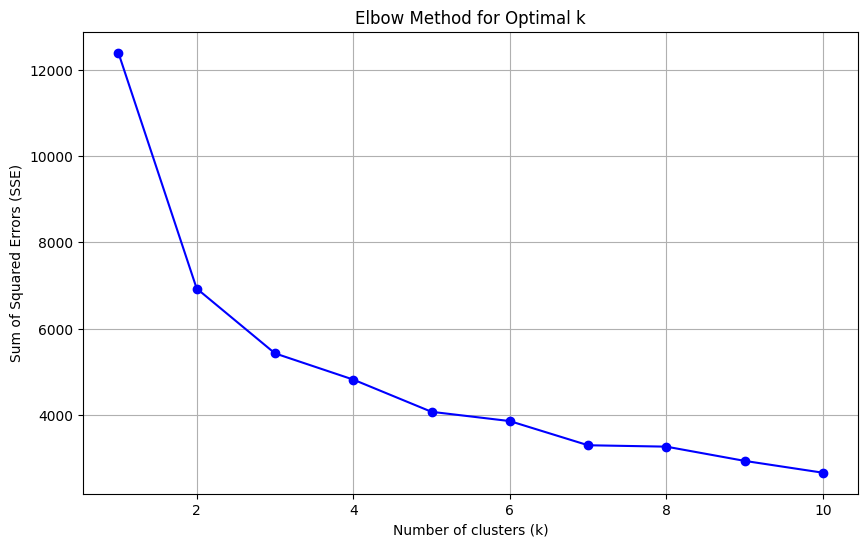

Optimal number of clusters determined by elbow method: 2
n_components = 3: Inertia = 6928.44, ARI = 0.6767, Silhouette = 0.4537, Variance = 72.636%


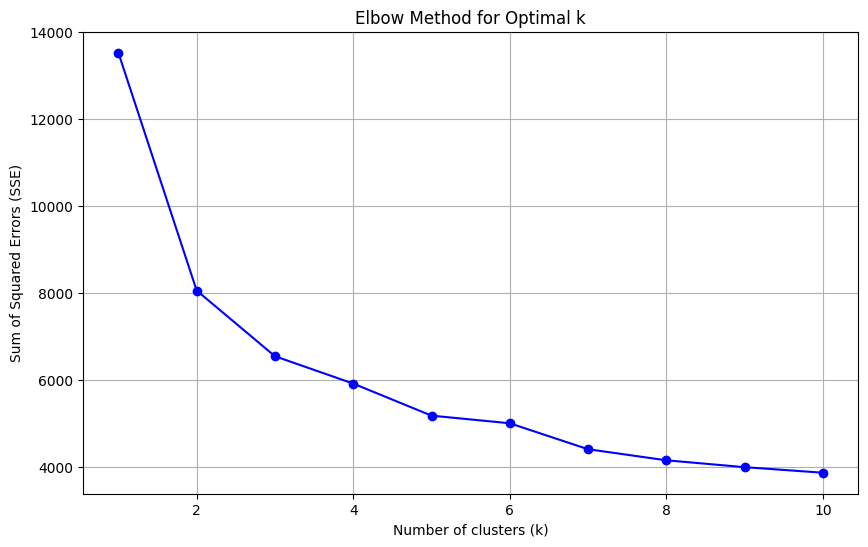

Optimal number of clusters determined by elbow method: 2
n_components = 4: Inertia = 8053.70, ARI = 0.6707, Silhouette = 0.4155, Variance = 79.239%


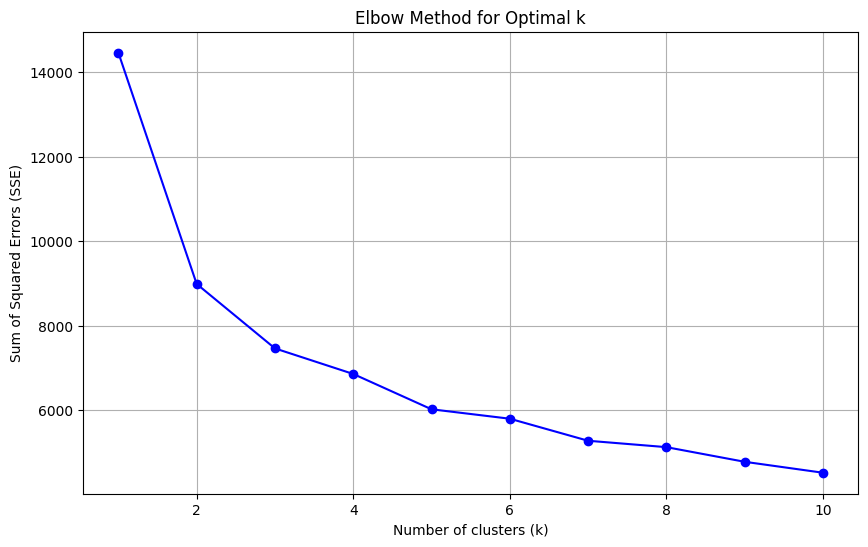

Optimal number of clusters determined by elbow method: 2
n_components = 5: Inertia = 8992.28, ARI = 0.6709, Silhouette = 0.3909, Variance = 84.734%


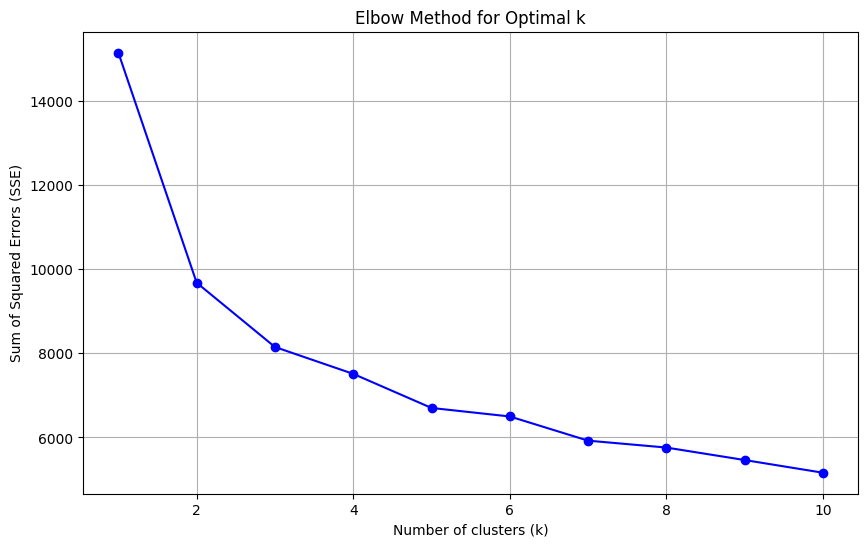

Optimal number of clusters determined by elbow method: 2
n_components = 6: Inertia = 9679.21, ARI = 0.6709, Silhouette = 0.3753, Variance = 88.759%


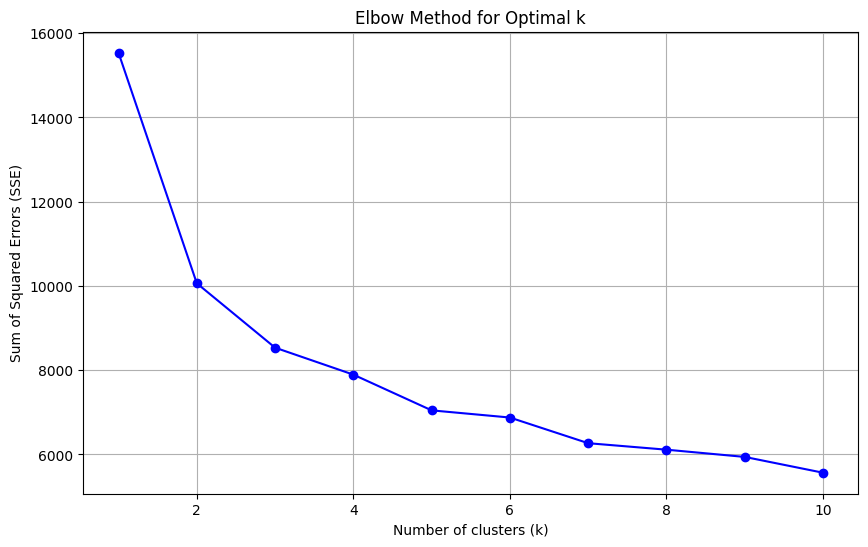

Optimal number of clusters determined by elbow method: 2
n_components = 7: Inertia = 10063.03, ARI = 0.6709, Silhouette = 0.3685, Variance = 91.010%


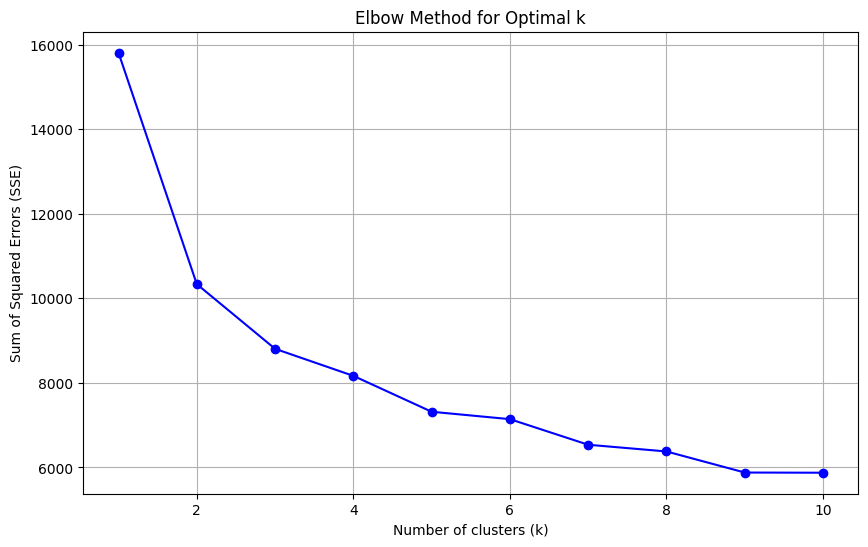

Optimal number of clusters determined by elbow method: 2
n_components = 8: Inertia = 10334.11, ARI = 0.6709, Silhouette = 0.3628, Variance = 92.598%


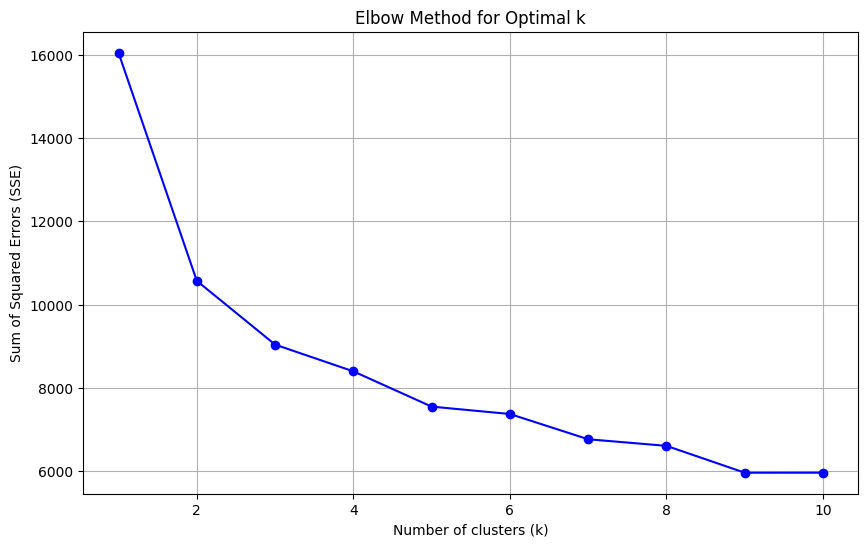

Optimal number of clusters determined by elbow method: 2
n_components = 9: Inertia = 10571.28, ARI = 0.6709, Silhouette = 0.3591, Variance = 93.988%


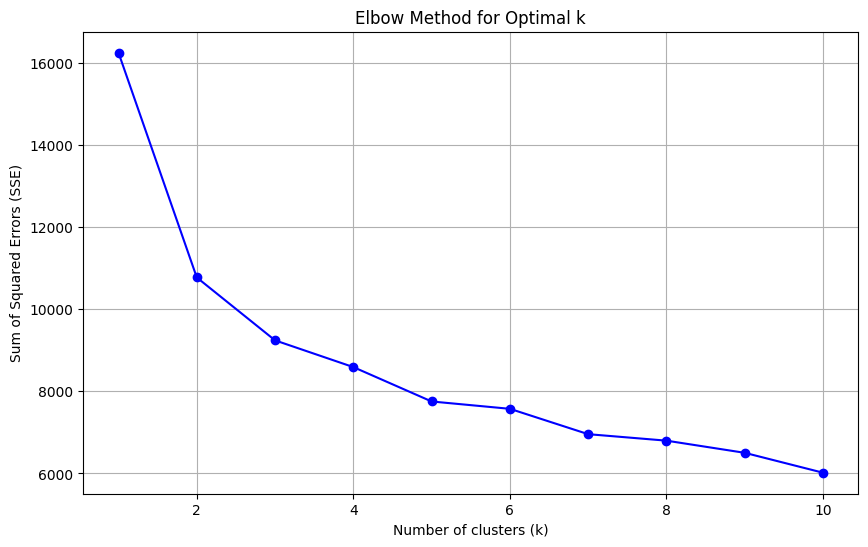

Optimal number of clusters determined by elbow method: 2
n_components = 10: Inertia = 10770.81, ARI = 0.6709, Silhouette = 0.3554, Variance = 95.157%


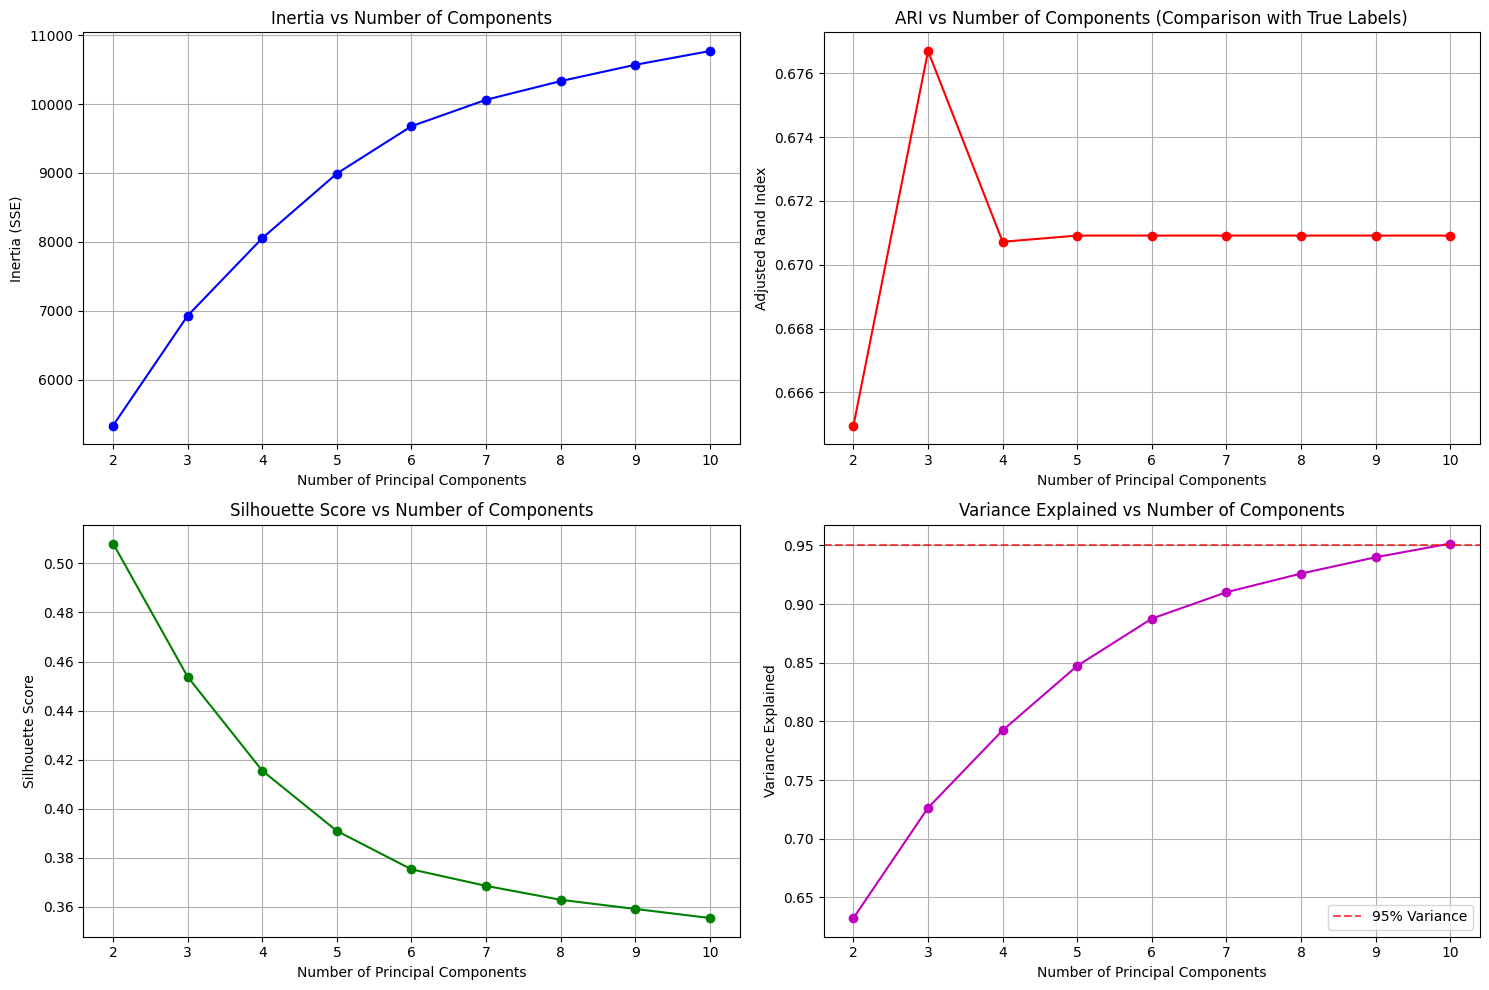


COMPARISON: OPTIMAL COMPONENTS VS FIXED CHOICES
Optimal components from elbow method: 2
Best ARI achieved with 3 components: 0.6767
Best Silhouette achieved with 2 components: 0.5081
Elbow method selection performance:
  - ARI: 0.6650
  - Silhouette: 0.5081
  - Variance explained: 63.243%


In [28]:
# 7. Experiment with different numbers of principal components
print("="*60)
print("EXPERIMENTING WITH DIFFERENT NUMBERS OF PRINCIPAL COMPONENTS")
print("="*60)

n_components_range = range(2, min(11, X.shape[1] + 1))
results = []

for n_components in n_components_range:
    # Apply PCA with different number of components
    pca = PCA(n_components=n_components)
    X_pca_current = pca.fit_transform(X)
    
    # Apply K-Means
    kmeans = KMeans(random_state=42)
    kmeans.fit(X_pca_current)
    
    # Store results
    results.append({
        'n_components': n_components,
        'inertia': kmeans.inertia_,
        'ari': adjusted_rand_score(y, kmeans.labels),
        'silhouette': silhouette_score(X_pca_current, kmeans.labels),
        'variance_explained': np.sum(pca.explained_variance_ratio_)
    })
    
    print(f"n_components = {n_components}: "
          f"Inertia = {kmeans.inertia_:.2f}, "
          f"ARI = {results[-1]['ari']:.4f}, "
          f"Silhouette = {results[-1]['silhouette']:.4f}, "
          f"Variance = {results[-1]['variance_explained']:.3%}")

# Plot results comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Inertia plot
axes[0, 0].plot(n_components_range, [r['inertia'] for r in results], 'bo-')
axes[0, 0].set_xlabel('Number of Principal Components')
axes[0, 0].set_ylabel('Inertia (SSE)')
axes[0, 0].set_title('Inertia vs Number of Components')
axes[0, 0].grid(True)

# ARI plot
axes[0, 1].plot(n_components_range, [r['ari'] for r in results], 'ro-')
axes[0, 1].set_xlabel('Number of Principal Components')
axes[0, 1].set_ylabel('Adjusted Rand Index')
axes[0, 1].set_title('ARI vs Number of Components (Comparison with True Labels)')
axes[0, 1].grid(True)

# Silhouette plot
axes[1, 0].plot(n_components_range, [r['silhouette'] for r in results], 'go-')
axes[1, 0].set_xlabel('Number of Principal Components')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Silhouette Score vs Number of Components')
axes[1, 0].grid(True)

# Variance explained plot
axes[1, 1].plot(n_components_range, [r['variance_explained'] for r in results], 'mo-')
axes[1, 1].set_xlabel('Number of Principal Components')
axes[1, 1].set_ylabel('Variance Explained')
axes[1, 1].set_title('Variance Explained vs Number of Components')
axes[1, 1].grid(True)
axes[1, 1].axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% Variance')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Comparison with optimal component selection
print("\n" + "="*60)
print("COMPARISON: OPTIMAL COMPONENTS VS FIXED CHOICES")
print("="*60)

# Find best ARI and best Silhouette
best_ari = max(results, key=lambda x: x['ari'])
best_silhouette = max(results, key=lambda x: x['silhouette'])

print(f"Optimal components from elbow method: {optimal_components}")
print(f"Best ARI achieved with {best_ari['n_components']} components: {best_ari['ari']:.4f}")
print(f"Best Silhouette achieved with {best_silhouette['n_components']} components: {best_silhouette['silhouette']:.4f}")

if optimal_components in [r['n_components'] for r in results]:
    optimal_result = next(r for r in results if r['n_components'] == optimal_components)
    print(f"Elbow method selection performance:")
    print(f"  - ARI: {optimal_result['ari']:.4f}")
    print(f"  - Silhouette: {optimal_result['silhouette']:.4f}")
    print(f"  - Variance explained: {optimal_result['variance_explained']:.3%}")

## Compare between sum of square errors / distances in both experiments

In [29]:
print("COMPARISON BETWEEN EXPERIMENTS")

print(f"Experiment 1 (K-Means only) - Inertia: {kmeans1.inertia_:.2f}")
print(f"Experiment 2 (PCA + K-Means) - Inertia: {kmeans2.inertia_:.2f}")

# Note: The inertia values are not directly comparable because they are calculated
# on different datasets (original vs PCA-transformed)

COMPARISON BETWEEN EXPERIMENTS
Experiment 1 (K-Means only) - Inertia: 11595.99
Experiment 2 (PCA + K-Means) - Inertia: 5332.98
